<a href="https://colab.research.google.com/github/anaortega2025/talentotech/blob/main/ejercio_eda_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Análisis de marketing: EDA + Visualización de datos

In [ ]:
#here I import all necessary libraries for project
import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/AliPakzad/Data-Analyst-Final-Portfolio-Project-Marketing-Analytics/main/marketing_data.csv"

df = pd.read_csv(url)

df.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df.shape

(2240, 28)

In [ ]:
df.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
print(df.isna().sum())

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [ ]:
df_clean = df.dropna()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2216 non-null   int64 
 1   YearBirth            2216 non-null   int64 
 2   Education            2216 non-null   object
 3   MaritalStatus        2216 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   DtCustomer           2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProducts      2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWebPurch

In [ ]:
df_clean.duplicated().sum()

np.int64(0)

In [ ]:
df_clean.drop(columns=['id'],  inplace = True)

In [ ]:
df_clean.Education.value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [ ]:
df_clean.MaritalStatus.value_counts()

,count
MaritalStatus,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
YOLO,2
Absurd,2


In [ ]:
df_clean.Country.value_counts()

,count
Country,
SP,1093
SA,337
CA,266
AUS,147
IND,147
GER,116
US,107
ME,3


In [ ]:
df_clean.Complain.value_counts()

,count
Complain,
0,2195
1,21


In [ ]:
df_clean.DtCustomer.value_counts()

,count
DtCustomer,
8/31/12,12
9/12/12,11
5/12/14,11
2/14/13,11
8/20/13,10
...,...
9/19/12,1
6/6/14,1
5/25/13,1


In [ ]:
# convert Date of customer's enrollment with the company into Python Date time object
df_clean["DtCustomer"]= pd.to_datetime(df_clean["DtCustomer"])
df_clean.DtCustomer.value_counts()

,count
DtCustomer,
2012-08-31,12
2012-09-12,11
2014-05-12,11
2013-02-14,11
2013-08-20,10
...,...
2012-09-19,1
2014-06-06,1
2013-05-25,1


In [ ]:
df_clean.Income.value_counts()

,count
Income,
7500.0,12
35860.0,4
63841.0,3
67445.0,3
48432.0,3
...,...
64590.0,1
41154.0,1
66973.0,1


In [ ]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
currentYear = date.year

print(f"Current Year -> {currentYear}")

df_clean['Age']= currentYear - df_clean['YearBirth']


df_clean['Age'].head()

Current Year -> 2025


,Age
0,55
1,64
2,67
3,58
4,36


In [ ]:
df_clean['ChildrenHome'] = df_clean['Kidhome'] + df_clean['Teenhome']

df_clean['ChildrenHome'].head()

,ChildrenHome
0,0
1,0
2,1
3,2
4,1


In [ ]:
#Number of Years of being a Customer
df_clean["NumYearCustomer"] = currentYear - df_clean["DtCustomer"].apply(lambda x: x.year)

df_clean["NumYearCustomer"]

,NumYearCustomer
0,11
1,11
2,11
3,11
4,11
...,...
2235,12
2236,12
2237,13
2238,13


In [ ]:
#Number of Years of being a Customer
df_clean["NumYearCustomer"] = currentYear - df_clean["DtCustomer"].apply(lambda x: x.year)

df_clean["NumYearCustomer"]

,NumYearCustomer
0,11
1,11
2,11
3,11
4,11
...,...
2235,12
2236,12
2237,13
2238,13


In [ ]:
df_clean['TotalNumPurchases'] = df_clean['NumDealsPurchases'] + df_clean['NumWebPurchases'] +\
                             df_clean['NumCatalogPurchases'] + df_clean['NumStorePurchases']

df_clean['TotalNumPurchases'].head()

,TotalNumPurchases
0,15
1,18
2,11
3,4
4,8


In [ ]:
df_clean['TotalAcceptedCmp'] = df_clean['AcceptedCmp1'] + df_clean['AcceptedCmp2'] + df_clean['AcceptedCmp3'] \
                             + df_clean['AcceptedCmp4'] + df_clean['AcceptedCmp5'] + df_clean['Response']

df_clean['TotalAcceptedCmp'].head()

,TotalAcceptedCmp
0,1
1,2
2,0
3,0
4,2


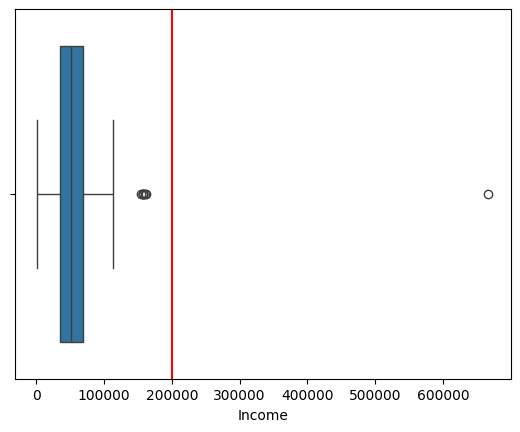

In [ ]:
sns.boxplot(x= df_clean["Income"])

plt.axvline(x=200000, color ='red')

plt.show()

In [ ]:
df_clean = df_clean[df_clean['Income']<200000]

len(df_clean)

2215

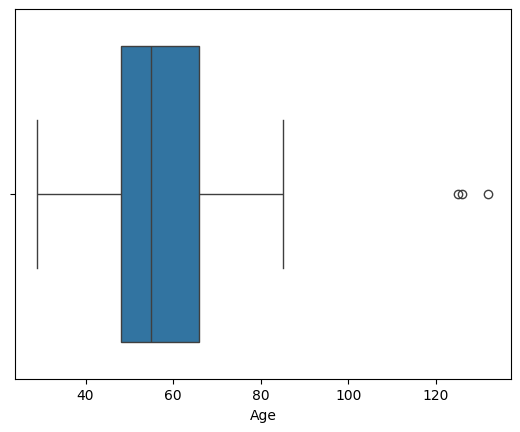

In [ ]:
sns.boxplot(x=df_clean["Age"])

plt.show()

In [ ]:
df_clean = df_clean[df_clean['Age']<100]

len(df_clean)

2212

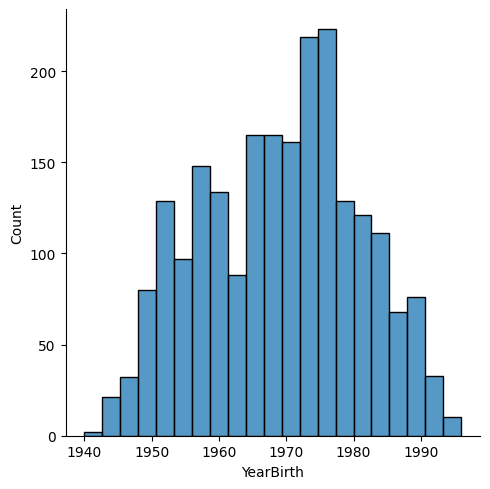

In [ ]:
sns.displot(x=df_clean['YearBirth'])
plt.show()

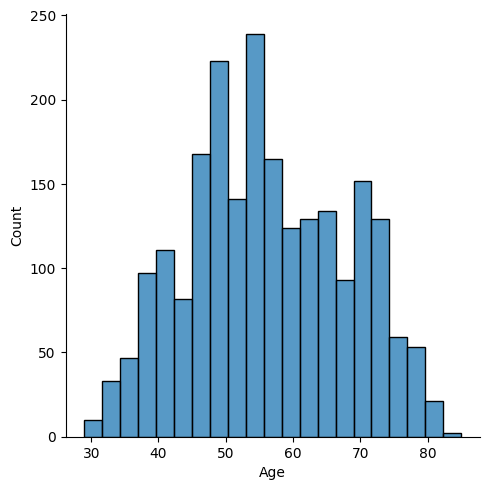

In [ ]:
sns.displot(x=df_clean['Age'])
plt.show()

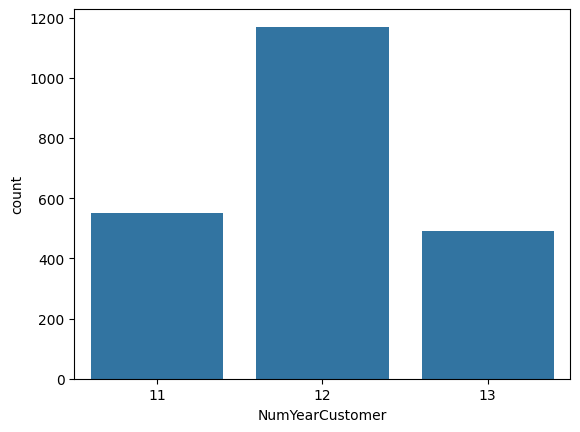

In [ ]:
sns.countplot(x=df_clean['NumYearCustomer'])
plt.show()

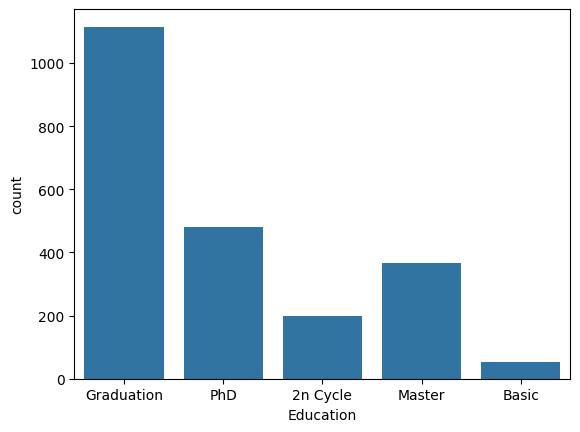

In [ ]:
chart = sns.countplot(x=df_clean['Education'])

plt.show()

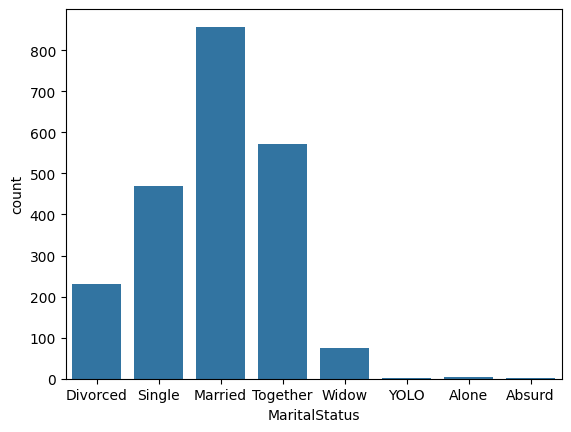

In [ ]:
chart = sns.countplot(x=df_clean['MaritalStatus'])

plt.show()

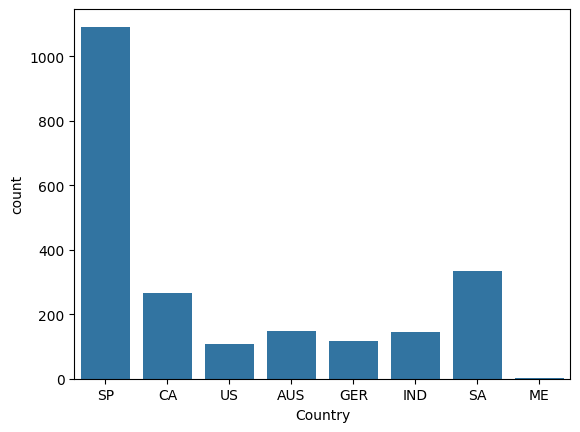

In [ ]:
sns.countplot(x=df_clean['Country'])

plt.show()

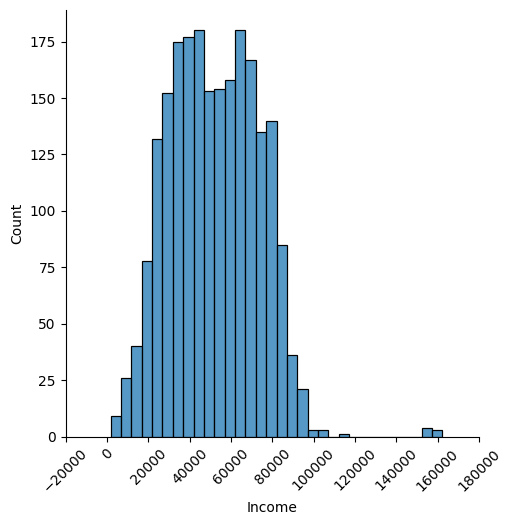

In [ ]:
chart = sns.displot(x=df_clean['Income'])

chart.set_xticklabels(rotation=45)

plt.show()

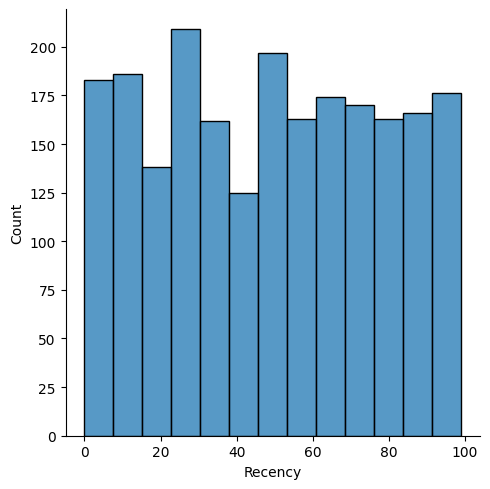

In [ ]:
sns.displot(x=df_clean['Recency'])

plt.show()

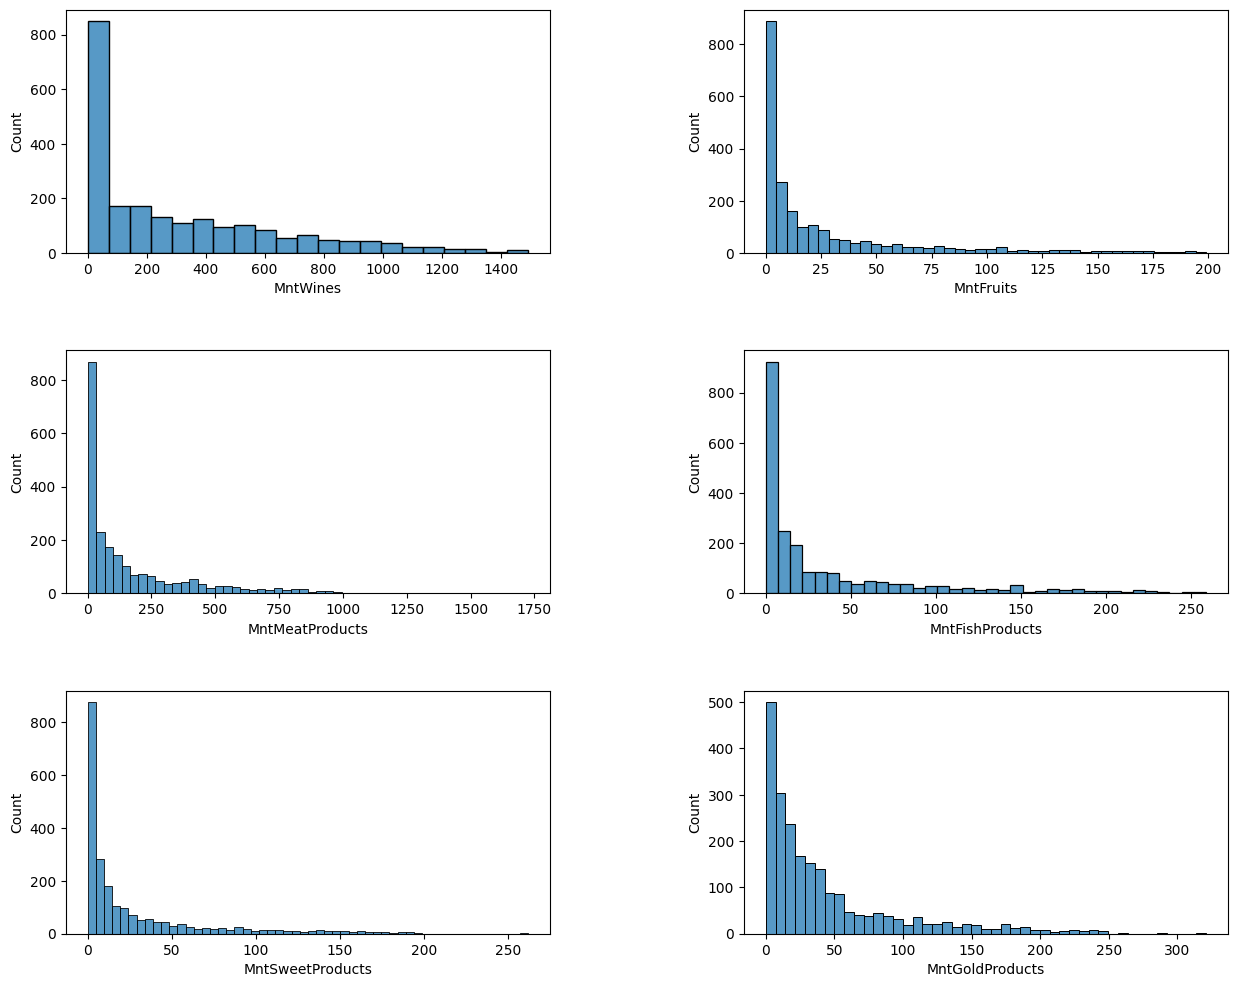

In [ ]:
cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
size = len(cols)

fig = plt.figure(figsize = (15, 12))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    sns.histplot(df_clean[cols[i]])
plt.show()

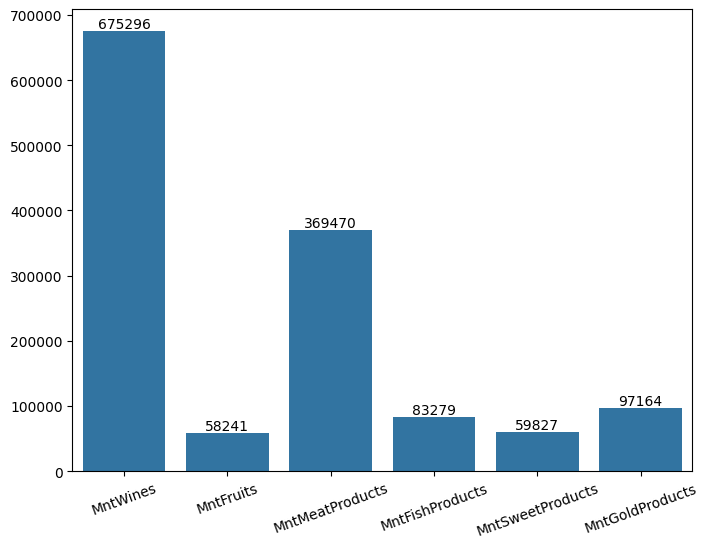

In [ ]:
fig = plt.figure(figsize = (8, 6))

amount_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

sr = df_clean[amount_cols].sum()

chart = sns.barplot(x= list(sr.index), y= list(sr.values))

chart.set_xticklabels(labels = list(sr.index), rotation=20)
chart.bar_label(chart.containers[0])

plt.show()


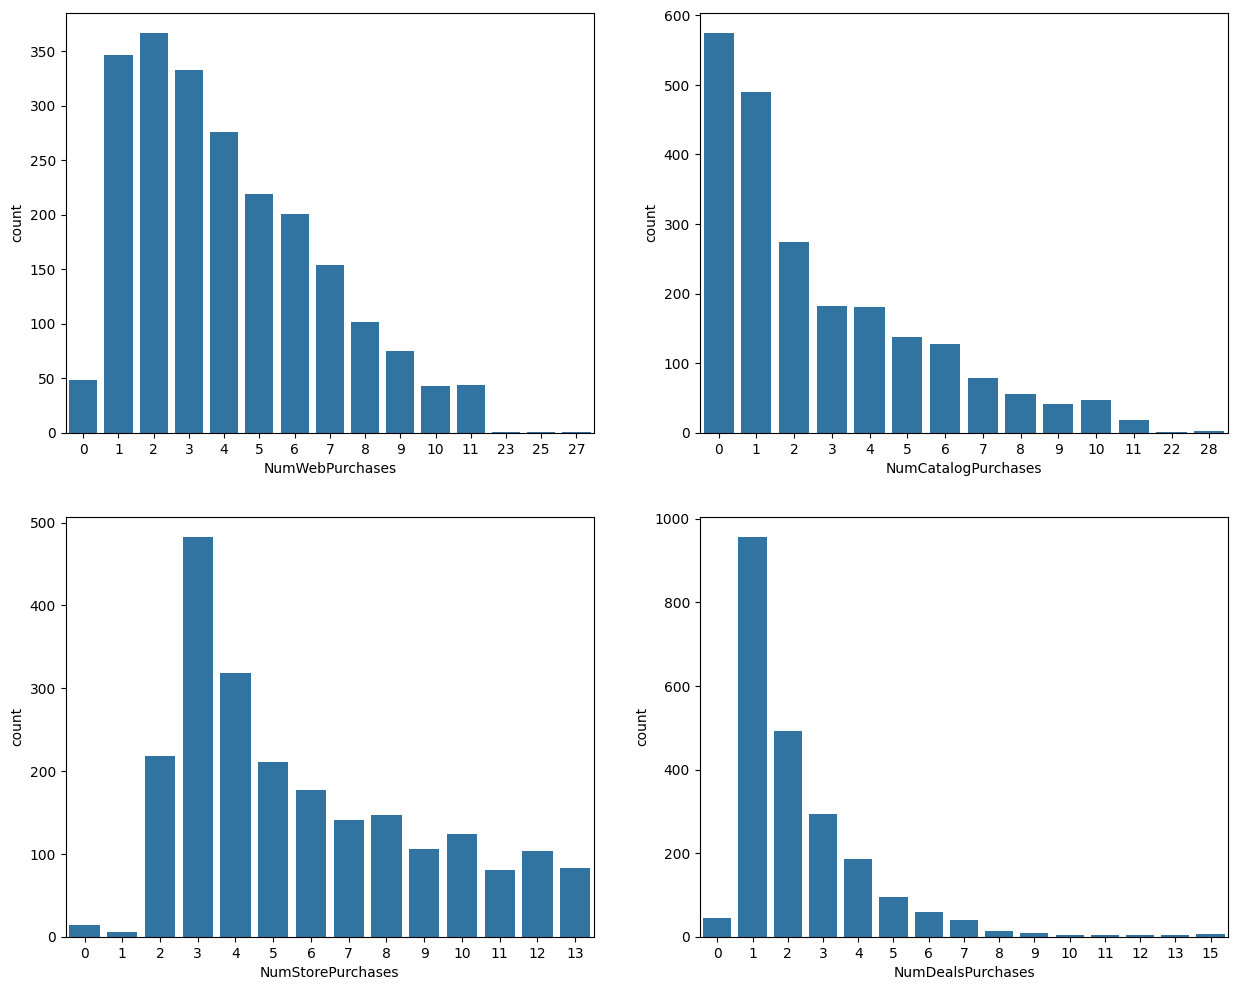

In [ ]:
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

size = len(cols)

fig = plt.figure(figsize = (15, 12))

for i in range(0,size):
    plt.subplot(2, 2, i+1)
    sns.countplot(x= df_clean[cols[i]])
plt.show()

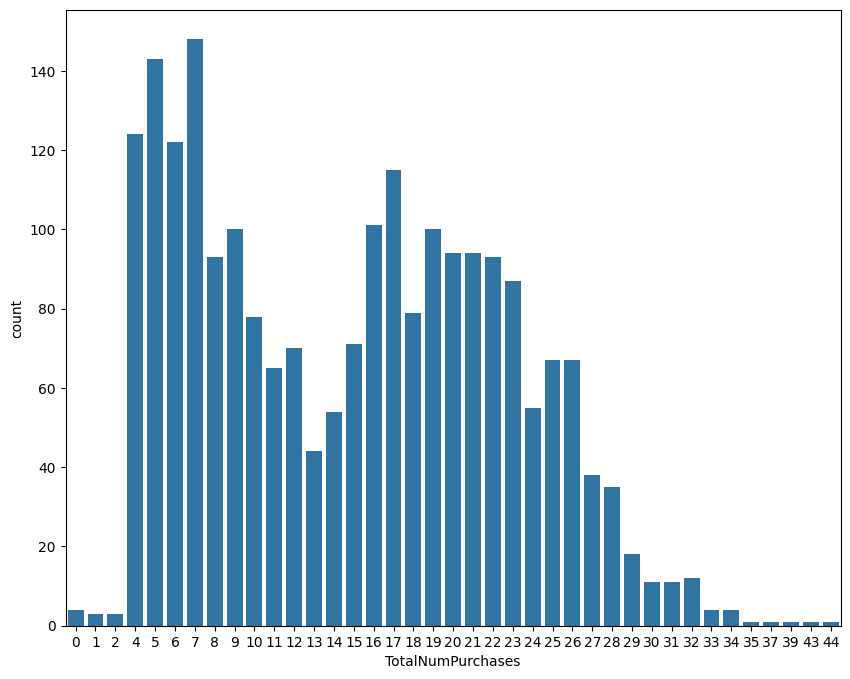

In [ ]:
fig = plt.figure(figsize = (10, 8))

sns.countplot(x= df_clean['TotalNumPurchases'])

plt.show()